<h1><center> Machine Learning Project  </center> </h1>
<h2><center> COMPSCI X433.6 Intro to Machine Learning using Python </center> </h2>
<h2><center> UC Berkeley - Extension</center> </h2>
<h3><center>    Prashant Chopalli </center> </h3>

## Introduction
Customer behavior prediction is used by many companies to understand the customer behavior. The dataset contains information about customer who stayed with the provider and those who switched providers. The goal is to predict the if the customer will churn or not using the various features like services, demographics etc.

### Problem ###
+ Prediction if the Telecom Customer will churn or not


<h3> Data Source </h3>

The data set includes information about:

+ Customers who left within the last month – the column is called Churn
+ Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers – gender, age range, and if they have partners and dependents
+ Customer Id
+ The “Churn” column is our target.
<br>
<br>Original Data Source from Kaggle</br>
<a href=https://www.kaggle.com/datasets/blastchar/telco-customer-churn> https://www.kaggle.com/datasets/blastchar/telco-customer-churn </a>

In [2]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_selector as col_selector
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# Read the csv file to create the dataset
df=pd.read_csv('Customer-Churn.csv')

In [4]:
# Print the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Print the columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Print the rows and columns of the dataset
df.shape

(7043, 21)

In [7]:
# Check for Null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Function to print the value counts of all the categorical features
def val_count(df,x):
    for col in x:
        print(col)
        print(df[col].value_counts())
        print(" ")
x=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
   'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod','Churn'
  ]
val_count(df,x)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
 
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
 
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
 
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
 
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
 
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
 
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
 
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
 
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
 
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
 
TechSupport
No 

In [9]:
# Print the data types of the features
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### EDA

<AxesSubplot:xlabel='Partner', ylabel='Count'>

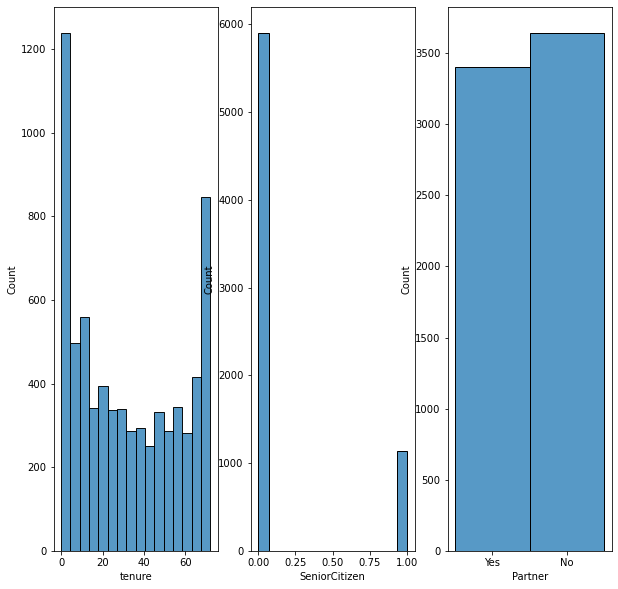

In [10]:
%matplotlib inline
fig,ax=plt.subplots(1,3,figsize=(10,10))
sns.histplot(data=df['tenure'],ax=ax[0])
sns.histplot(data=df['SeniorCitizen'],ax=ax[1])
sns.histplot(data=df['Partner'],ax=ax[2])

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='Churn', ylabel='Count'>

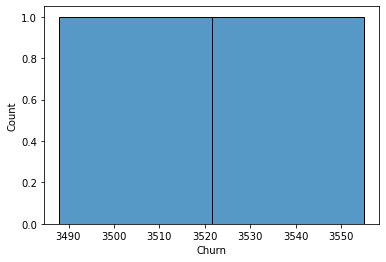

In [12]:
dfg=df['Churn'].groupby(df['gender']).count()
sns.histplot(dfg)

### Data Preparation

#### Down Sample

Churn<br></br>
No     5174 <br></br>
Yes    1869

The dataset is imbalanced, the customer with target value "No" is ~3 times more than the "Yes". We wil upsample the minority feature and make the sample size of Yes and No almost equal

In [13]:
# If you want to downsample, use below

# df=df.sample(frac=1)
# df_yes=df[(df['Churn']=='Yes')]
# print(df_yes.shape)
# df_no=df.loc[df['Churn']=='No'][:1869]
# print(df_no.shape)
# new_df=pd.concat([df_yes,df_no])
# df_new = new_df.sample(frac=1, random_state=42)
# df_new.shape

# Here we are upsampling the 'yes' to 2.75 times 
# Separate the No values 
df_no=df[(df['Churn']=='No')]
print("Instance with No value in original dataset" , df_no.shape)
# Separate the Yes values
df_yes=df.loc[df['Churn']=='Yes']
print("Instance with Yes value in original dataset" , df_yes.shape)
# Upsample the instances with No values
df_up=df_yes.sample(frac=2.75,replace=True,random_state=42)
df_up.shape
# Concanate the Yes and No to form a new dataset
new_df=pd.concat([df_up,df_no])
df_new = new_df.sample(frac=1, random_state=42)


Instance with No value in original dataset (5174, 21)
Instance with Yes value in original dataset (1869, 21)


In [14]:
print('Size of the new dataset',df_new.shape)
print("Value Counts of Yes and No in the new dataset\n",df_new['Churn'].value_counts())

Size of the new dataset (10314, 21)
Value Counts of Yes and No in the new dataset
 No     5174
Yes    5140
Name: Churn, dtype: int64


#### Print the value counts after upsampling

In [15]:
xcol=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
   'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod','Churn'
  ]
val_count(df_new,xcol)

gender
Male      5244
Female    5070
Name: gender, dtype: int64
 
SeniorCitizen
0    8324
1    1990
Name: SeniorCitizen, dtype: int64
 
Partner
No     5733
Yes    4581
Name: Partner, dtype: int64
 
Dependents
No     7645
Yes    2669
Name: Dependents, dtype: int64
 
PhoneService
Yes    9326
No      988
Name: PhoneService, dtype: int64
 
MultipleLines
No                  4820
Yes                 4506
No phone service     988
Name: MultipleLines, dtype: int64
 
InternetService
Fiber optic    5351
DSL            3235
No             1728
Name: InternetService, dtype: int64
 
OnlineSecurity
No                     6020
Yes                    2566
No internet service    1728
Name: OnlineSecurity, dtype: int64
 
OnlineBackup
No                     5229
Yes                    3357
No internet service    1728
Name: OnlineBackup, dtype: int64
 
DeviceProtection
No                     5254
Yes                    3332
No internet service    1728
Name: DeviceProtection, dtype: int64
 
TechSupport
No 

In [16]:
# Data types of the dataset
df_new.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

+ The feature Totalcharges have some blank '' values, this didn't show up in the isnull() check. We will convert the blank values to Null values and check again

In [17]:
df_new['TotalCharges'].replace(to_replace=' ', value=np.NAN,inplace=True)
df_new.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

+ There are only 11 blank values so we will delete them

In [18]:
df_new.dropna(subset=['TotalCharges'],inplace=True)

In [19]:
df_new.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# Convert Total Charges to float value
df_new['TotalCharges']=df_new['TotalCharges'].astype(float)

In [21]:
# Check the data types of the features
df_new.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
# Find Correlation between the features
df_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,-0.001877,0.205351,0.072860
tenure,-0.001877,1.000000,0.228911,0.857655
MonthlyCharges,0.205351,0.228911,1.000000,0.585742
TotalCharges,0.072860,0.857655,0.585742,1.000000


<AxesSubplot:>

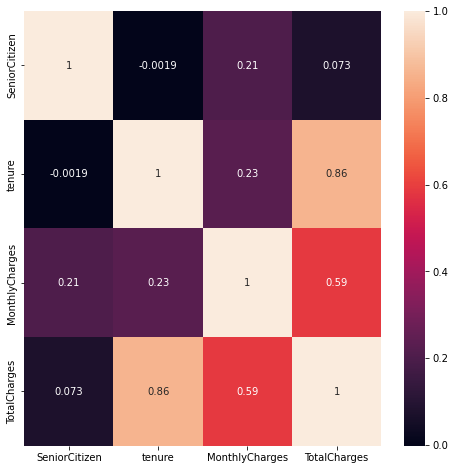

In [23]:
# Print the Correlation matrix
%matplotlib inline
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True)

#### Feature Selection

In [24]:
# Drop the 'customerId' as it is not relevant for model prediction. Since 'Churn' is the target variable it is dropped
x_1=df_new.drop(columns=['customerID','Churn'],axis=1)

# Target variable
y_1=df_new['Churn']

* Feature Selection using SelectKBest

In [25]:
# Copy the datasets for feature selection and apply Labelencoding. This is just for feature selection purpose. 
# We will build pipelines and use Onehotencoding for model preparation
x_2=x_1.copy(deep=True)
y_2=y_1.copy(deep=True)
x_2.columns
xlist=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       ]
for col in xlist:
    label=LabelEncoder()
    x_2[col]=label.fit_transform(x_2[col])
# x_2.head()



In [26]:
# Use SelectKBest to get the top features based on scores
from sklearn.feature_selection import SelectKBest, chi2
sk=SelectKBest(chi2, k=10)
sk.fit_transform(x_2, y_2)
print("Scores\n",sk.scores_)
names=[]
scores=[]
print("\nColumn Names and Scores:")
for name,score in zip(x_1.columns,sk.scores_):
    print(name,score)
    names.append(name)
    scores.append(score)
# scores.sort()
# # print(names)
# plt.figure(figsize=(20,4))
# sns.barplot(x=names,y=scores)
# # sk.get_feature_names_out([x_1.columns])
# # dtree=DecisionTreeClassifier()
# # dtree.fit(x_1,y_1)
# # y_pred_dt=dtree.predict(x_test)
# # print('Accuracy of Decision Tree model',accuracy_score(y_test,y_pred_dt))

Scores
 [2.61033310e-02 2.20518650e+02 1.63955027e+02 2.92718206e+02
 3.63784912e+04 1.08530071e-01 2.75168362e+01 1.92408365e+01
 1.17211906e+03 4.62906726e+02 4.35119875e+02 1.18321919e+03
 2.19693383e+01 2.96558115e+01 2.80199110e+03 1.82069516e+02
 1.07839416e+02 6.21718597e+03 1.35829482e+06]

Column Names and Scores:
gender 0.026103331019653436
SeniorCitizen 220.51865032004056
Partner 163.9550271243553
Dependents 292.71820576782085
tenure 36378.491174735405
PhoneService 0.1085300706885294
MultipleLines 27.516836154184098
InternetService 19.240836478379833
OnlineSecurity 1172.1190625735837
OnlineBackup 462.906726306683
DeviceProtection 435.1198754112815
TechSupport 1183.2191943043454
StreamingTV 21.969338281026385
StreamingMovies 29.65581148667586
Contract 2801.991098412223
PaperlessBilling 182.0695157153629
PaymentMethod 107.83941603404827
MonthlyCharges 6217.18596550218
TotalCharges 1358294.8160234666


+ We will drop the features with lower scores and only use the top 10 features

In [27]:
x_1=x_2.drop(columns=['gender','Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV',
                 'StreamingMovies', 'PaperlessBilling','PaymentMethod'],axis=1)
x_1.head()

,SeniorCitizen,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
2797,0,0,3,0,0,2,0,0,100.95,329.95
2812,0,0,66,0,2,0,2,1,104.05,6890.00
3705,0,1,69,2,0,0,2,2,61.40,4059.85
5768,0,0,44,0,0,0,0,1,90.65,3974.15
150,0,1,8,0,0,0,2,0,68.55,564.35


### Model Building and Accuracy test 

#### Building the pipelines

In [28]:
# Import needed libraries
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
mpipe = ColumnTransformer(transformers=
       [('num', StandardScaler(), selector(dtype_exclude="object")),
       ('cat', OneHotEncoder(), selector(dtype_include="object"))],
        remainder='drop')

In [29]:
# Apply Label Encoding on the Target feature
lb=LabelEncoder()
y=lb.fit_transform(y_1)

In [30]:
# Apply the scaling and encoding to the dataset
x=mpipe.fit_transform(x_1)

In [31]:
# Split the dataset into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)


##### Logistic Regression model

In [32]:
# Create the classifier
lr=LogisticRegression(max_iter=200,penalty='l1',solver='liblinear')

#Train the model using the training set
lr.fit(x_train,y_train)

LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')

In [33]:
# Train the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
y_train_pred=lr.predict(x_train)
acc_train=accuracy_score(y_train,y_train_pred)
print('Accuracy of Training model using Logistic Regression', acc_train)

Accuracy of Training model using Logistic Regression 0.7574617811210871


In [34]:
# #Predict the test dataset
y_test_pred=lr.predict(x_test)
acc_test=accuracy_score(y_test,y_test_pred)
print('Accuracy of Test model using Logistic Regression',acc_test)
print('Classification report of test model with Logistic regression\n ', classification_report(y_test,y_test_pred))

Accuracy of Test model using Logistic Regression 0.762251334303736
Classification report of test model with Logistic regression
                precision    recall  f1-score   support

           0       0.77      0.74      0.75      1023
           1       0.75      0.79      0.77      1038

    accuracy                           0.76      2061
   macro avg       0.76      0.76      0.76      2061
weighted avg       0.76      0.76      0.76      2061



In [35]:
# Use cross validation to get the accuracy score of the train model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
c_score=cross_val_score(lr,x_train,y_train,cv=cv,n_jobs=-1)
print(c_score.mean())

0.7564907325684025


##### Hyperparameter tunning

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
lr_grid=LogisticRegression()
params= {'penalty':['l1', 'l2', 'elasticnet'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr=GridSearchCV(lr_grid,param_grid = params, cv = 5, verbose=True, n_jobs=-1)
fit_lr = grid_lr.fit(x_train, y_train)
print(fit_lr.best_estimator_)
print(fit_lr.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
LogisticRegression(penalty='l1', solver='saga')
{'penalty': 'l1', 'solver': 'saga'}


In [37]:
# Model building with best parameters
# Create the classifier
lr1=LogisticRegression(max_iter=200,penalty='l1',solver='saga')

#Train the model using the training set
lr1.fit(x_train,y_train)

# Predict the dataset
y_test_pred1=lr1.predict(x_test)

print('Accuracy of Training model using Logistic Regression', accuracy_score(y_test,y_test_pred1))
print('Confusion matrix using Logistic Regression', confusion_matrix(y_test,y_test_pred1))

Accuracy of Training model using Logistic Regression 0.762251334303736
Confusion matrix using Logistic Regression [[752 271]
 [219 819]]


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

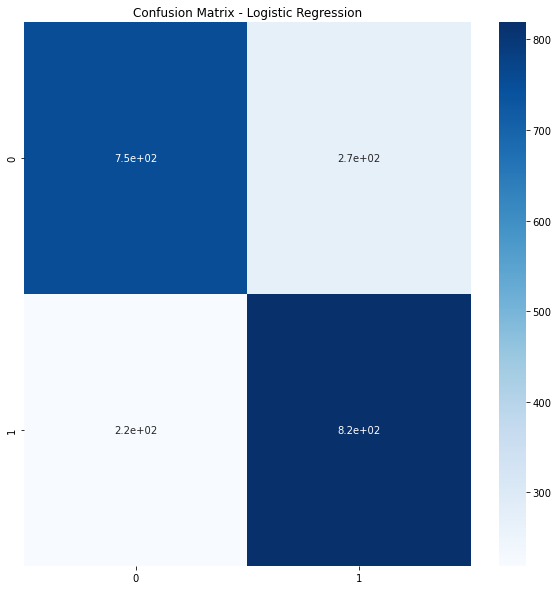

In [38]:
# Confusion matrix for the test data
%matplotlib inline
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_test_pred1)
sns.heatmap(conf,annot=True, cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')

In [39]:
# Train and Test the Stocashtic model
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss='log',tol=1e-4,shuffle=True,learning_rate='optimal')
clf.fit(x_train,np.ravel(y_train))

y_train_clf=clf.predict(x_train)
acc_train_clf=accuracy_score(y_train,y_train_clf)

#Predict the test dataset
y_test_clf=clf.predict(x_test)
acc_test_clf=accuracy_score(y_test,y_test_clf)

print('Accuracy of Train set using Stocashtic Gradient Classifier', acc_train_clf)
print('Accuracy of Test  set  using Stocashtic Gradient Classifier', acc_test_clf)

Accuracy of Train set using Stocashtic Gradient Classifier 0.7460567823343849
Accuracy of Test  set  using Stocashtic Gradient Classifier 0.7588549247937895


##### Decision Tree model

In [40]:
# Create the Decision tree Classifier and train the model
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

#Predict the test dataset
y_pred_dt=dtree.predict(x_test)
print('Decision Tree model accuracy-',accuracy_score(y_test,y_pred_dt))
print('Decison tree model Classification Report\n',classification_report(y_test,y_pred_dt))

Decision Tree model accuracy- 0.8728772440562833
Decison tree model Classification Report
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      1023
           1       0.84      0.93      0.88      1038

    accuracy                           0.87      2061
   macro avg       0.88      0.87      0.87      2061
weighted avg       0.88      0.87      0.87      2061



###### Hyperparameter tunning

In [41]:
from sklearn.model_selection import GridSearchCV
params= {'splitter':['best','random'],'max_depth':[10, 20, 50]}
grid_dtree=GridSearchCV(dtree,param_grid = params, cv = 5, verbose=True, n_jobs=-1)
fit_dtree = grid_dtree.fit(x_train, y_train)
print(fit_dtree.best_estimator_)
print(fit_dtree.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
DecisionTreeClassifier(max_depth=20, splitter='random')
{'max_depth': 20, 'splitter': 'random'}


In [42]:
dtree1=DecisionTreeClassifier(max_depth=50,splitter='random')
dtree1.fit(x_train,y_train)

#Predict the test dataset
y_pred_dt1=dtree1.predict(x_test)
print('Decision Tree model accuracy-',accuracy_score(y_test,y_pred_dt1))
print('Decison tree model Confusion Matrix\n',confusion_matrix(y_test,y_pred_dt1))

Decision Tree model accuracy- 0.873847646773411
Decison tree model Confusion Matrix
 [[825 198]
 [ 62 976]]


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

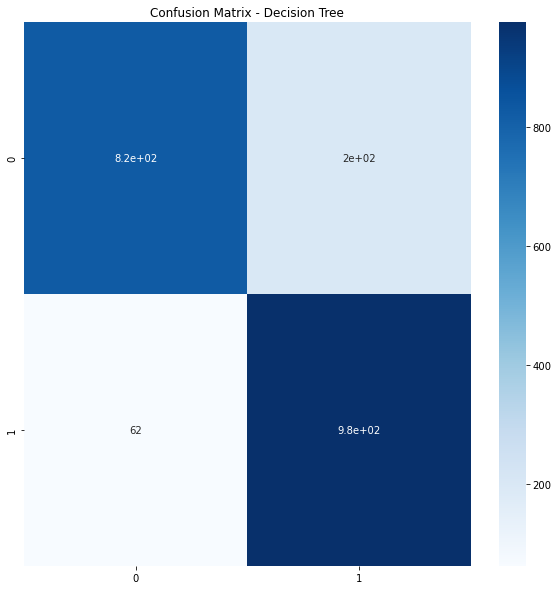

In [43]:
# Confusion matrix for the test data
%matplotlib inline
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_pred_dt1)
sns.heatmap(conf,annot=True, cmap="Blues")
plt.title('Confusion Matrix - Decision Tree')

Observation : The best accuracy for Decision tree is achieved with parameters = {'max_depth': 50, 'splitter': 'random'}

#### Random Forest model

In [44]:
# Create the Classifier and train the model
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Predict the test dataset
y_pred_rf=rf.predict(x_test)
print('Random Forest model accuracy-',accuracy_score(y_test,y_pred_rf))
print('Random Forest model Confusion Matrix\n',confusion_matrix(y_test,y_pred_rf))

Random Forest model accuracy- 0.905870936438622
Random Forest model Confusion Matrix
 [[882 141]
 [ 53 985]]


###### Hyperparameter tunning

In [45]:
from sklearn.model_selection import GridSearchCV
params= {'n_estimators':[100,200,500],'max_features':['auto', 'sqrt', 'log2']}
grid_rf=GridSearchCV(rf,param_grid = params, cv = 5, verbose=True, n_jobs=-1)
fit_rf = grid_rf.fit(x_train, y_train)
print(fit_rf.best_estimator_)
print(fit_rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
RandomForestClassifier(max_features='sqrt', n_estimators=200)
{'max_features': 'sqrt', 'n_estimators': 200}


In [46]:
# Train with the best parameters
rfbest=RandomForestClassifier(n_estimators = 100, max_features='auto' )
rfbest.fit(x_train,y_train)

#Predict the test dataset
y_pred_rfbest=rfbest.predict(x_test)
print('Random Forest model accuracy-',accuracy_score(y_test,y_pred_rfbest))
print('Random Forest model Confusion matrix\n',confusion_matrix(y_test,y_pred_rfbest))

Random Forest model accuracy- 0.9044153323629306
Random Forest model Confusion matrix
 [[880 143]
 [ 54 984]]


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

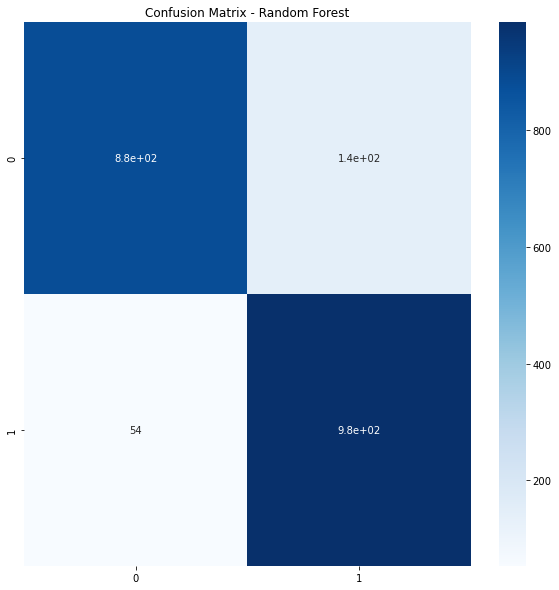

In [47]:
# Confusion matrix for the test data
%matplotlib inline
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_pred_rfbest)
sns.heatmap(conf,annot=True, cmap="Blues")
plt.title('Confusion Matrix - Random Forest')

Observation : The best accuracy for Random Forest is achieved with default parameters

##### Extra Tree Classifier model

In [48]:
# Create the Classifier and train the model
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

#Predict the test dataset
y_pred_etc=etc.predict(x_test)
print('Accuracy with Extra Tree Classifier model',accuracy_score(y_test,y_pred_etc))
print('Extra Tree model Classification Report\n',classification_report(y_test,y_pred_etc))

Accuracy with Extra Tree Classifier model 0.8990781174187288
Extra Tree model Classification Report
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1023
           1       0.87      0.93      0.90      1038

    accuracy                           0.90      2061
   macro avg       0.90      0.90      0.90      2061
weighted avg       0.90      0.90      0.90      2061



In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500,learning_rate=0.05)
ada_clf.fit(x_train,y_train)
y_pred_ada=ada_clf.predict(x_test)
print('Accuracy with AdaBoost model',accuracy_score(y_test,y_pred_ada))

Accuracy with Extra Tree Classifier model 0.9039301310043668


In [53]:
from sklearn.model_selection import GridSearchCV
params= {'n_estimators':[100,200,500],'learning_rate':[0.01, 0.05, 0.1]}
grid_ada=GridSearchCV(ada_clf,param_grid = params, cv = 5, verbose=True, n_jobs=-1)
fit_ada = grid_ada.fit(x_train, y_train)
print(fit_ada.best_estimator_)
print(fit_ada.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=500)
{'learning_rate': 0.1, 'n_estimators': 500}


In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500,learning_rate=0.1)
ada_clf.fit(x_train,y_train)
y_pred_ada=ada_clf.predict(x_test)
print('Accuracy with Extra Tree Classifier model',accuracy_score(y_test,y_pred_ada))

Accuracy with Extra Tree Classifier model 0.9102377486656963


##### Gaussian Naive Bayes model

In [48]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training set
gnb.fit(x_train, y_train)

#Predict the test dataset
y_pred_gnb = gnb.predict(x_test)

print("Accuracy with Gaussian Naive Bayes model:", accuracy_score(y_test, y_pred_gnb))

Accuracy with Gaussian Naive Bayes model: 0.75254730713246


##### PCA

In [49]:
from sklearn.decomposition import PCA
# reduce dimensionality to 4
pca=PCA(n_components=4)

In [50]:
# Fit the dataset and check the variance ratio
fit_pca=pca.fit_transform(x)
x_pca=pd.DataFrame(data=fit_pca,columns=['PC1', 'PC2', 'PC3','PC4'])
pca.explained_variance_ratio_

array([0.34128288, 0.16811626, 0.09044653, 0.08204189])

In [51]:
# Apply the Logistic Regression to the PCA dataset 
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state=1)
lg=LogisticRegression(penalty='l1', C=0.1, solver='saga') 
lg.fit(x_train, y_train)

y_pred_lg = lg.predict(x_test)

from sklearn import metrics

# Model Accuracy
print("Accuracy of Logistic Regression with PCA:", metrics.accuracy_score(y_test, y_pred_lg))

Accuracy of Logistic Regression with PCA: 0.7486656962639495


#### SVM

In [52]:
from sklearn.svm import SVC
# Creating the classifier
# svc = SVC(kernel='linear') 
svc = SVC()
# svc=SVC(kernel="poly", degree=3)

# Fit the data
svc.fit(x_train, y_train) 

# Predict the test dataset
y_pred_svc = svc.predict(x_test)

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print("Acuuracy with SVM",accuracy_score(y_test,y_pred_svc))

[[707 308]
 [195 851]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1015
           1       0.73      0.81      0.77      1046

    accuracy                           0.76      2061
   macro avg       0.76      0.76      0.75      2061
weighted avg       0.76      0.76      0.76      2061

Acuuracy with SVM 0.7559437166424066


##### Hyperparameter tunning

In [53]:
parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[1, 5, 10]}
grid_svc = GridSearchCV(svc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)
fit_svc = grid_svc.fit(x_train, y_train)
print(fit_svc.best_estimator_)
print(fit_svc.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


In [54]:
# Model buld with the best parameters
svc1 = SVC(kernel='rbf',C=10)

# Fit the data
svc1.fit(x_train, y_train) 

# Predict the test dataset
y_pred_svc1 = svc1.predict(x_test)

print(classification_report(y_test,y_pred_svc1))
print("Acuuracy with SVM",accuracy_score(y_test,y_pred_svc1))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1015
           1       0.74      0.81      0.77      1046

    accuracy                           0.76      2061
   macro avg       0.76      0.76      0.76      2061
weighted avg       0.76      0.76      0.76      2061

Acuuracy with SVM 0.7583697234352256


In [58]:
# Model buld with the best parameters
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',degree=5, coef0=0.1, C=5)

# Fit the data
svc_poly.fit(x_train, y_train) 

# Predict the test dataset
y_pred_svcpoly = svc_poly.predict(x_test)

print(classification_report(y_test,y_pred_svcpoly))
print("Acuuracy with SVM",accuracy_score(y_test,y_pred_svcpoly))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1015
           1       0.74      0.79      0.76      1046

    accuracy                           0.75      2061
   macro avg       0.75      0.75      0.75      2061
weighted avg       0.75      0.75      0.75      2061

Acuuracy with SVM 0.7486656962639495


### Observations
The models and corresponding accuracy used to train the model
<br></br>
<table >
<tr><th >Model <th><th> Accuracy <tr><tr>
<tr><td> Logistic Regression <td><td> 76.22 <td><tr>
    <tr><td> Stocashtic Gradient <td><td> 75.44 <td><tr>
        <tr><td> Decision Tree  <td><td> 88.88 <td><tr>
            <tr><td> Random Forest <td><td> 90.29 <td><tr>
                <tr><td> Extree Tree  <td><td> 89.86 <td><tr>
                    <tr><td> Gaussian Naive Bayes  <td><td> 75.25 <td><tr>
                         <tr><td> Logistic with PCA  <td><td> 74.86 <td><tr>
                        <tr><td> SVM  <td><td> 75.83 <td><tr>
<table>